**Import data using pandas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'G:\My Drive\Analytics\marketing.csv')


## Inspecting data

In [3]:
print(df.head())

      user_id date_served marketing_channel          variant converted  \
0  a100000029      1/1/18         House Ads  personalization      True   
1  a100000030      1/1/18         House Ads  personalization      True   
2  a100000031      1/1/18         House Ads  personalization      True   
3  a100000032      1/1/18         House Ads  personalization      True   
4  a100000033      1/1/18         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years          1/1/18   
1            English            English  19-24 years          1/1/18   
2            English            English  24-30 years          1/1/18   
3            English            English  30-36 years          1/1/18   
4            English            English  36-45 years          1/1/18   

  date_canceled subscribing_channel is_retained  
0           NaN           House Ads        True  
1           NaN       

## Checking data types & missing values

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


## Summary Statistics

In [5]:
# To summarize the file 
print(df.describe())

           user_id date_served marketing_channel  variant converted  \
count        10037       10021             10022    10037     10022   
unique        7309          31                 5        2         2   
top     a100000882     1/15/18         House Ads  control     False   
freq            12         789              4733     5091      8946   

       language_displayed language_preferred    age_group date_subscribed  \
count               10037              10037        10037            1856   
unique                  4                  4            7              31   
top               English            English  19-24 years         1/16/18   
freq                 9793               9275         1682             163   

       date_canceled subscribing_channel is_retained  
count            577                1856        1856  
unique           115                   5           2  
top           4/2/18           Instagram        True  
freq              15                 6

# Data Cleaning: Analyzing individual columns & fixing data types


In [6]:
#The column [converted] data type should be boolean not object from the formular ".info"
df['converted'].dtype


dtype('O')

### changing the data type of column [converted] to Boolean

In [7]:
df['converted'].astype('boolean')

0         True
1         True
2         True
3         True
4         True
         ...  
10032     True
10033     True
10034    False
10035     True
10036    False
Name: converted, Length: 10037, dtype: boolean

In [8]:
df['converted']= df['converted'].astype('boolean')
df['converted'].dtype
print('The datatype is {}'.format(df['converted'].dtype))

The datatype is boolean


## checking the column [user_id]

In [9]:
#this checks the length of characters in each of the particular column

id_len = df['user_id'].apply(lambda x:len(x))

df['user_id'].astype(str).str[0].unique()
id_len.unique()



array([10,  9], dtype=int64)

In [10]:
# the above output gave unique numbers of  10 & 9,we need to confirm why this difference or whether it is an error
#lets check the [user_id] that has 9 characters
condition=df['user_id'].str.len()==9

#lets add a dataframe to the variable: df[condition] and referenced to a variable
df_filtered =df[condition]

#lets check the result
df_filtered


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
9944,a10009231,NaN,NaN,control,<NA>,English,English,19-24 years,NaN,NaN,NaN,NaN
9945,a10009232,NaN,NaN,control,<NA>,English,English,24-30 years,NaN,NaN,NaN,NaN
9946,a10009233,NaN,NaN,control,<NA>,English,English,30-36 years,NaN,NaN,NaN,NaN
9947,a10009234,NaN,NaN,control,<NA>,English,English,36-45 years,NaN,NaN,NaN,NaN
9948,a10009235,NaN,NaN,control,<NA>,English,English,45-55 years,NaN,NaN,NaN,NaN
9949,a10009236,NaN,NaN,control,<NA>,English,English,55+ years,NaN,NaN,NaN,NaN
9950,a10009237,NaN,NaN,control,<NA>,English,English,0-18 years,NaN,NaN,NaN,NaN
9951,a10009238,NaN,NaN,control,<NA>,English,English,19-24 years,NaN,NaN,NaN,NaN
9952,a10009239,NaN,NaN,control,<NA>,English,English,24-30 years,NaN,NaN,NaN,NaN
9953,a10009240,NaN,NaN,control,<NA>,English,English,30-36 years,NaN,NaN,NaN,NaN


In [11]:
#after little research,the most significant is the first character of the first variable,so found that if all are the same

df['user_id'].astype('str').str[0].unique()

array(['a'], dtype=object)

**The above output signify that all the [user_id] has their first character to be 'a',this satisfactory for column[user_id]**

## changing the Date Format

In [12]:
#To change the format from from mm/dd/yyy to yyyy-mm-dd

df['date_served'] = pd.to_datetime(
df['date_served'])

df['date_subscribed'] = pd.to_datetime(
df['date_subscribed'])

df['date_canceled'] = pd.to_datetime(
df['date_canceled'])

df['date_canceled']


0              NaT
1              NaT
2              NaT
3              NaT
4              NaT
           ...    
10032   2018-01-24
10033          NaT
10034          NaT
10035          NaT
10036          NaT
Name: date_canceled, Length: 10037, dtype: datetime64[ns]

In [13]:
#creating a new column that signify the day of the week it was served
#could not be converted to int due to null values

df['day_served'] = df['date_served'].dt.dayofweek
#df['date_served'].dt.dayofweek.sort_values(ascending=False)
df['day_served']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10032    2.0
10033    2.0
10034    4.0
10035    2.0
10036    5.0
Name: day_served, Length: 10037, dtype: float64

In [14]:
 # Creating a  weekday  dictionary
weekday_dict={0.0:'Mon', 1.0:'Tues', 2.0:'Wed', 3.0:'Thu', 4.0:'Fri', 5.0:'Sat', 6.0:'Sun'}
    
# Then map the weekday dict to the created day_sered
df['day_served'] = df['day_served'].map(weekday_dict)
df['day_served'].dropna()


0        Mon
1        Mon
2        Mon
3        Mon
4        Mon
        ... 
10032    Wed
10033    Wed
10034    Fri
10035    Wed
10036    Sat
Name: day_served, Length: 10021, dtype: object

## working with the age group column

In [15]:
#To remove  a particular string in a variable say like(50 years to 50)
df['age_group'] = df['age_group'].str.replace(" years","")
df['age_group'].head(3)


0     0-18
1    19-24
2    24-30
Name: age_group, dtype: object


## Checking if language displayed is same as language preferred




In [16]:
df['is_language_correct']=(df['language_displayed']==df['language_preferred'])
print("Language is not correct for {} observations".format(df['is_language_correct'].count()-df['is_language_correct'].sum()))
 
#* count()-counts the number of not empty values for each row, or column
#*sum() - Getting the frequency of a specific value/true values



Language is not correct for 522 observations


**The data cleaning process has concluded, and it's now necessary to review the cleaned data to ensure that it meets the desired quality standards.**

In [17]:
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,day_served,is_language_correct
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18,2018-01-01,NaT,House Ads,True,Mon,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24,2018-01-01,NaT,House Ads,True,Mon,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30,2018-01-01,NaT,House Ads,True,Mon,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36,2018-01-01,NaT,House Ads,True,Mon,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45,2018-01-01,NaT,House Ads,True,Mon,True


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  boolean       
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
 12  day_served           10021 non-null  object        
 13  is_language_correct  10037 non-

# Exploratory analysis

## How many users see marketing assets?

In [19]:
# Aggregate unique users that see ads by date,nunique() is used in order to avoid duplicates user_id which is unique
daily_users = df.groupby(['date_served'])['user_id'].nunique()
print(daily_users.head(5))

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


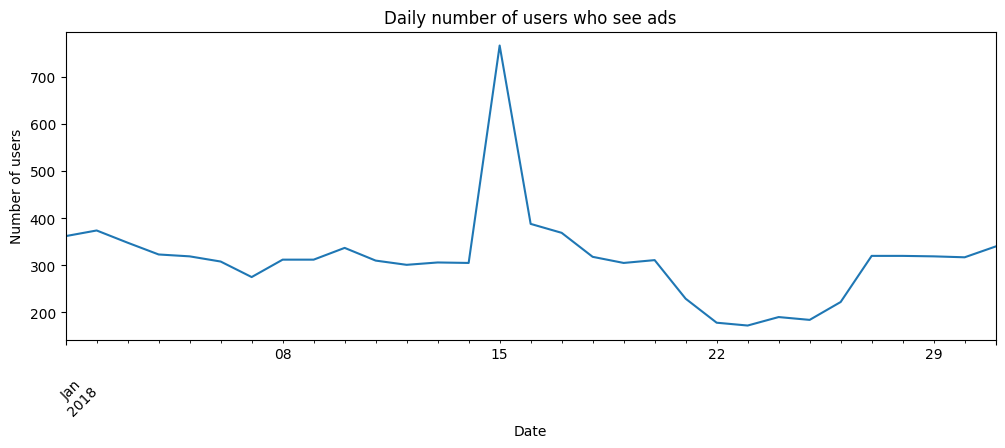

In [20]:
#visualizing the result


# Annotate

plt.figure(figsize=(12,4))
plt.title('Daily number of users who see ads')
daily_users.plot()
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.xticks(rotation = 45)
plt.show()


## Total Number Of Marketing Channel used within the month

In [21]:
channel_count=df['marketing_channel'].value_counts(sort=True,ascending=False)
channel_count

House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64

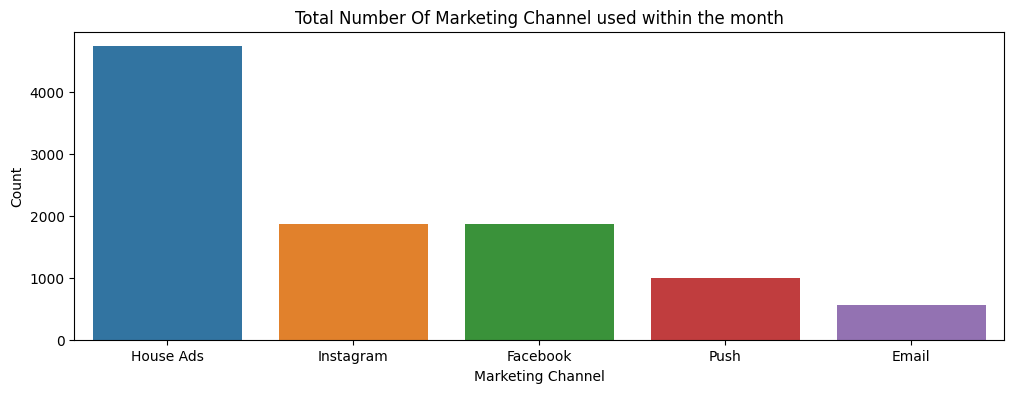

In [22]:
# lets Visualize it using bar graph
plt.figure(figsize=(12, 4))#The figsize attribute allows us to specify the width and height of a figure in-unit inches
sns.barplot(x=channel_count.index, y=channel_count.values)
plt.xlabel("Marketing Channel")
plt.ylabel("Count")
plt.title("Total Number Of Marketing Channel used within the month", fontsize=12)
plt.show()



In [23]:
daily_ads_count=df.pivot_table(values="user_id",index="date_served", columns="marketing_channel", aggfunc=len)
daily_ads_count.head(10)
#values - column to aggregate, optional
#columns- column, Grouper, array, or list of the previous
#aggfunc -function, list of functions, dict, default numpy.mean



marketing_channel,Email,Facebook,House Ads,Instagram,Push
date_served,,,,,
2018-01-01,1,69,191,78,36
2018-01-02,4,64,250,63,36
2018-01-03,2,63,220,66,37
2018-01-04,2,66,168,64,36
2018-01-05,1,64,160,70,36
2018-01-06,5,64,152,65,29
2018-01-07,3,52,132,60,34
2018-01-08,1,67,154,65,32
2018-01-09,2,59,157,60,37


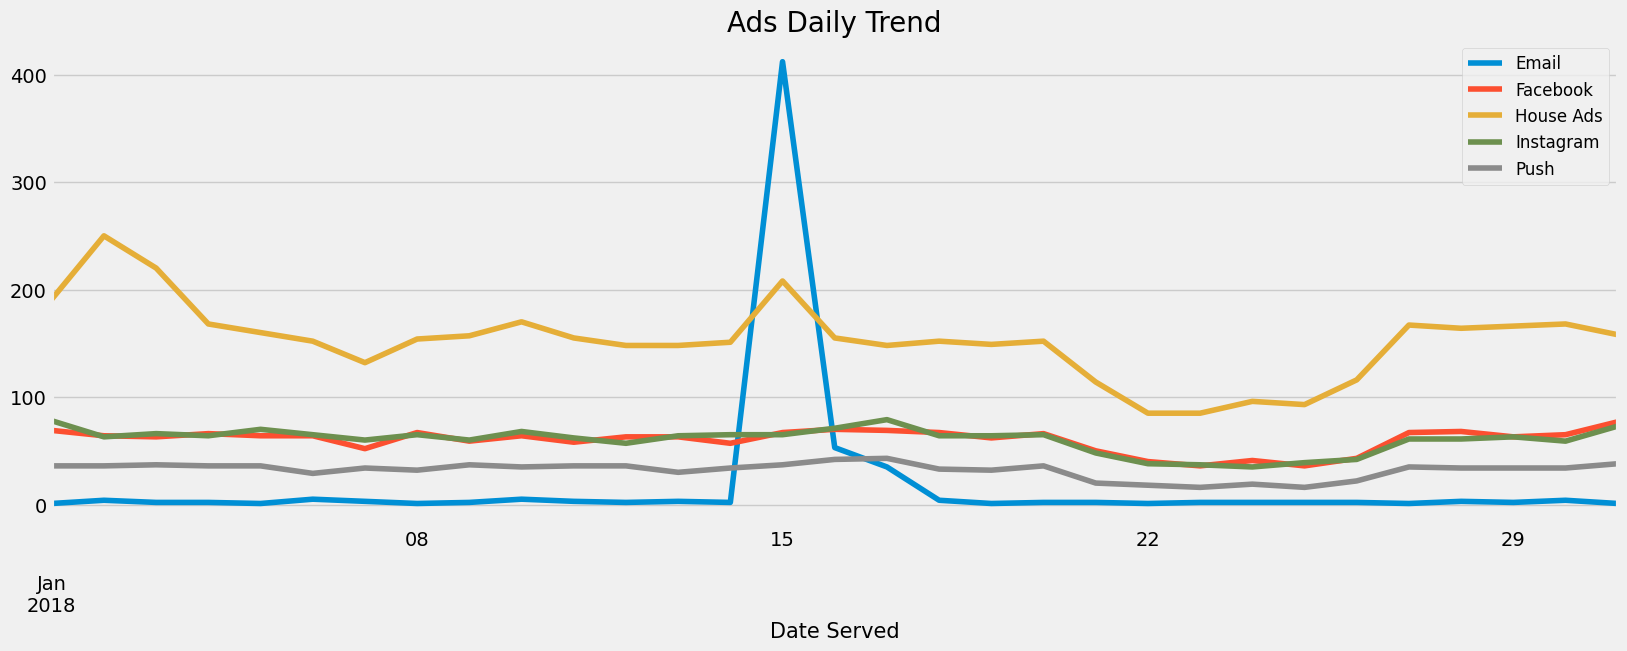

In [24]:
# lets vvisualize it using the line graph

plt.style.use('fivethirtyeight')
daily_ads_count.plot(kind='line',figsize=(18,6))
plt.xlabel("Date Served",size=15);
plt.title("Ads Daily Trend",size=20)
plt.legend(loc='upper right',fontsize=12);


- Other than the email blast on the 15th of the month, there has been negligible activity
- The bulk of the chunk consists of house ads, but their numbers have been fluctuating.
- Throughout the month, there has been no significant change in the performance of Facebook, Instagram, and push ads.

**Solution to my Observation**

1.**Increase activity:** Since there has been negligible activity other than the email blast, increasing the frequency of marketing activities could help. This could involve running more house ads or experimenting with different types of ads on different platforms.

2.**Address fluctuation in house ads:** The fluctuation in house ads could be due to various factors such as changes in budget, targeting, or creative. It would be useful to analyze the data and identify the cause of these fluctuations. Once the root cause is determined, steps can be taken to address it.

3.**Experiment with different channels:** While Facebook, Instagram, and push ads are currently not showing significant changes, it may be worthwhile to experiment with other channels to see if they perform better. This could include channels **such as Google Ads, LinkedIn, or TikTok depending on the target audience and the nature of the product or service being marketed.**

4.**Refine targeting:** It may be helpful to revisit the target audience for the marketing efforts and refine the targeting to ensure that the ads are reaching the right people. This could involve analyzing data on customer demographics, interests, and behavior to create more targeted campaigns.

5.**Improve creative:** The creative used in the marketing efforts could be a factor in the lack of significant performance. Experimenting with different messaging, visuals, and formats could help improve the performance of the ads. It may also be useful to conduct user testing to get feedback on the creative and make improvements based on the feedback.

In [25]:
conversions= df.groupby('marketing_channel')['converted'].sum() # to check the total number of marketing_channel whose converted are true
ads = df.groupby('marketing_channel')['converted'].count()# to check the total number of marketing_channel whose converted are both true and false
conversion_df =pd.concat([conversions,ads],axis=1)
conversion_df

,converted,converted
marketing_channel,,
Email,193,565
Facebook,237,1860
House Ads,298,4733
Instagram,265,1871
Push,83,993


In [26]:
#changing the columns 
conversion_df.columns=['conversions','ads_served']
conversion_df

,conversions,ads_served
marketing_channel,,
Email,193,565
Facebook,237,1860
House Ads,298,4733
Instagram,265,1871
Push,83,993


In [27]:
conversion_df['conversion_rate'] = (conversion_df['conversions'] / conversion_df['ads_served']) * 100
conversion_df['conversion_rate'] = conversion_df['conversion_rate'].round(2).astype(str) + '%'

conversion_df

,conversions,ads_served,conversion_rate
marketing_channel,,,
Email,193,565,34.16%
Facebook,237,1860,12.74%
House Ads,298,4733,6.3%
Instagram,265,1871,14.16%
Push,83,993,8.36%


In [28]:
conversions= df.groupby(['variant','marketing_channel'])['converted'].sum() # to check the total number of variant, marketing_channel whose converted are true
ads = df.groupby(['variant','marketing_channel'])['converted'].count()# to check the total number of variant, marketing_channel whose converted are both true and false
conversion_df =pd.concat([conversions,ads],axis=1)
conversion_df

converted  converted
variant         marketing_channel                      
control         Email                     80        274
                Facebook                  52        894
                House Ads                172       2552
                Instagram                 52        888
                Push                      15        468
personalization Email                    113        291
                Facebook                 185        966
                House Ads                126       2181
                Instagram                213        983
                Push                      68        525

In [29]:
#changing the columns 
conversion_df.columns=['conversions','ads_served']
conversion_df['conversion_rate'] = round(conversion_df['conversions'] / conversion_df['ads_served'],2)
conversion_df

conversions  ads_served  conversion_rate
variant         marketing_channel                                          
control         Email                       80         274             0.29
                Facebook                    52         894             0.06
                House Ads                  172        2552             0.07
                Instagram                   52         888             0.06
                Push                        15         468             0.03
personalization Email                      113         291             0.39
                Facebook                   185         966             0.19
                House Ads                  126        2181             0.06
                Instagram                  213         983             0.22
                Push                        68         525             0.13

In [30]:
conversion_df['conversions'].groupby(level=0).sum()

variant
control            371
personalization    705
Name: conversions, dtype: Int64

In [31]:
conversion_df['ads_served'].groupby(level=0).sum()

variant
control            5076
personalization    4946
Name: ads_served, dtype: int64

**Although both groups had a similar number of ads per channel, the personalization group achieved significantly higher conversions compared to the control group.The distribution of ads by channel below indicates that both groups had a roughly equal number of ads per channel.**

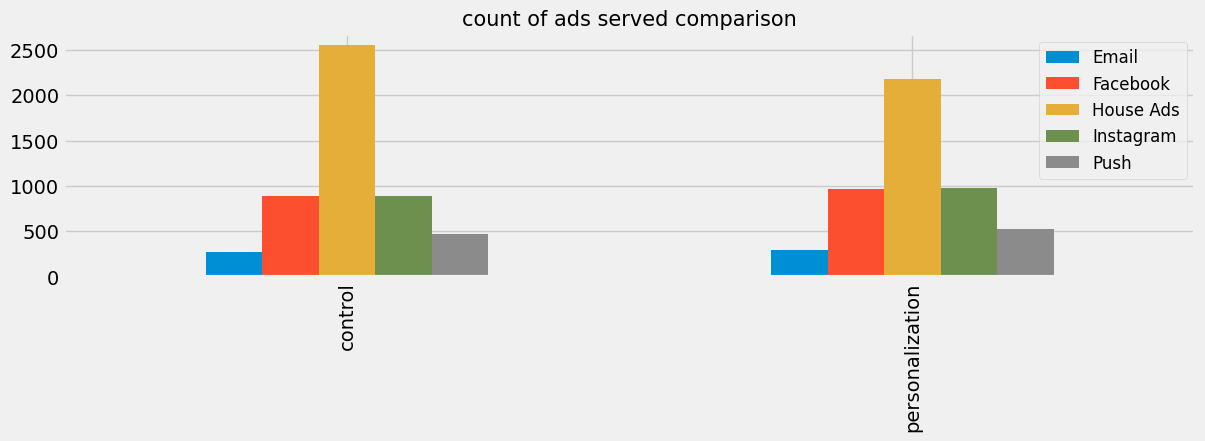

In [34]:
# lets visualize it using the line graph

plt.style.use('fivethirtyeight')
conversion_df.unstack(level=2).plot(kind='bar',y='ads_served',figsize=(13,3))#reshapes the dataframe by moving the index level 0 (assuming it is a multi-index dataframe) to become columns, which results in a wider dataframe.
plt.xlabel("");
plt.title("count of ads served comparison",size=15)
plt.legend(loc='upper right',fontsize=12);

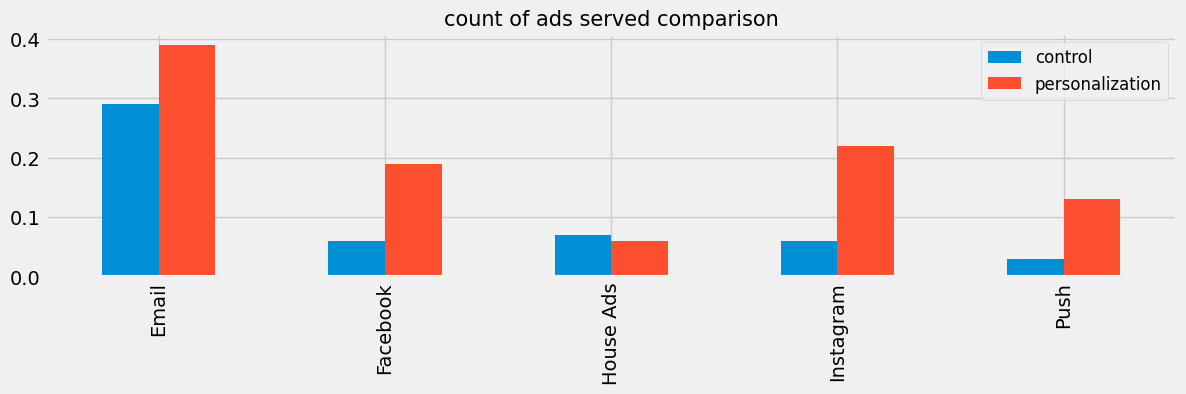

In [33]:
plt.style.use('fivethirtyeight')
conversion_df.unstack(level=0).plot(kind='bar',y='conversion_rate',figsize=(13,3))#reshapes the dataframe by moving the index level 0 (assuming it is a multi-index dataframe) to become columns, which results in a wider dataframe.
plt.xlabel("");
plt.title("count of ads served comparison",size=15)
plt.legend(loc='upper right',fontsize=12);